
# Data Mining Project: Titanic Survival Classification

---

## 1. Introduction to the Problem

This project is aiming to solve is to **predict whether a passenger survived the Titanic disaster** based on their demographic and travel information.  
This is a **classification problem** because the target variable (Survived) is categorical (0 = No, 1 = Yes).  

**Questions:**  
- Can we accurately predict if a passenger survived based on their characteristics?  
- Which features are most important for survival?  



## 2. Introduction to the Data

The data for this problem is the **Titanic dataset**, which contains passenger information (name, age, gender, class, etc.) and survival status.  
- Source: [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic/data)  
- The dataset contains 891 rows and 12 columns.  

**Features include:**  
- **pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- **sex**: Gender  
- **age**: Age in years  
- **sibsp**: # of siblings/spouses aboard  
- **parch**: # of parents/children aboard  
- **fare**: Passenger fare  
- **embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **survived**: Target (0 = No, 1 = Yes)  


In [81]:

import pandas as pd
import seaborn as sns
data = pd.read_csv("data/titanic.csv")



## 3. Pre-processing the Data

Steps:  
- Drop irrelevant columns (like name, deck, embark_town).  
- Handle missing values in `age` and `embarked`.  
- Encode categorical variables (sex, class, embarked).  
- Ensure target variable is numeric.  


In [82]:
# Drop unnecessary columns
data = data.drop(columns=["class", "deck", "embark_town", "alive", "adult_male", "who"])

# Handle missing values 
data["age"] = data["age"].fillna(data["age"].median())
data["embarked"] = data["embarked"].fillna(data["embarked"].mode()[0])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in ["sex", "embarked"]:
    data[col] = encoder.fit_transform(data[col])

# Drop rows with missing target
data = data.dropna(subset=["survived"])

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,2,True
3,1,1,0,35.0,1,0,53.1000,2,False
4,0,3,1,35.0,0,0,8.0500,2,True



## 4. Data Understanding / Visualization 

We will visualize the dataset to explore:  
- Survival rate by gender, class, and age.  
- Correlation heatmap.  


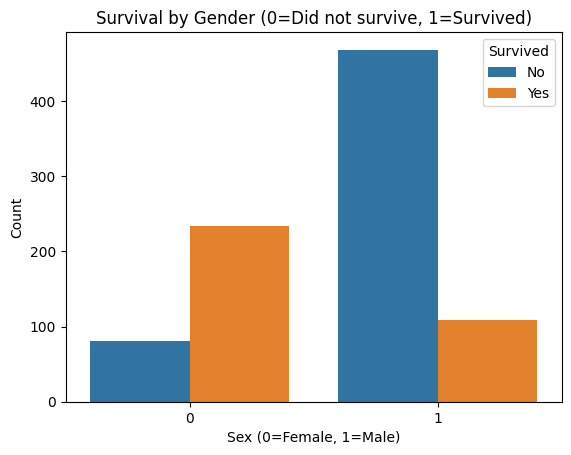

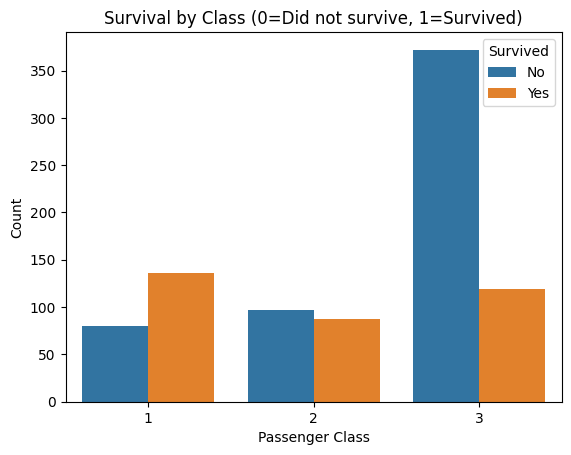

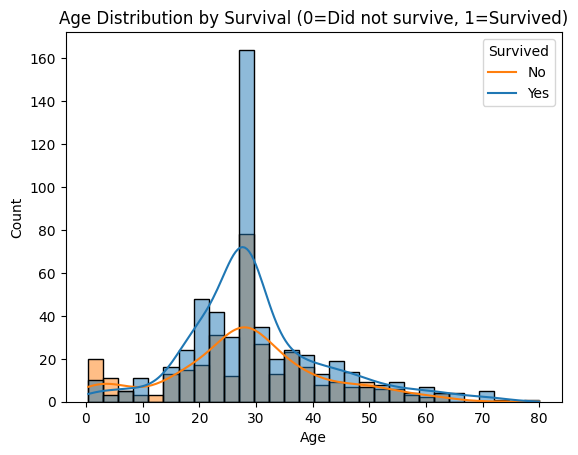

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival by gender
sns.countplot(x="sex", hue="survived", data=data)
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("Count")
plt.title("Survival by Gender (0=Did not survive, 1=Survived)")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Survival by class
sns.countplot(x="pclass", hue="survived", data=data)
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival by Class (0=Did not survive, 1=Survived)")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Age distribution
sns.histplot(data=data, x="age", hue="survived", bins=30, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival (0=Did not survive, 1=Survived)")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


## 5. Modeling 

These are the three classification models tested:  
- **Logistic Regression** (linear baseline).  
- **Decision Tree** (non-linear, interpretable).  
- **Random Forest** (ensemble, usually more accurate).  


In [84]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = data.drop("survived", axis=1)
y = data["survived"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Initialize models
log_model = LogisticRegression(max_iter=500)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

# Fit models
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



## 6. Evaluation 

The model will be evaluated by using:  
- **Accuracy**  
- **Precision, Recall, F1-score**  
- **Confusion Matrix**  


In [85]:

from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model
}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       156
           1       0.77      0.79      0.78       112

    accuracy                           0.81       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix:
 [[130  26]
 [ 24  88]]


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       156
           1       0.76      0.72      0.74       112

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Confusion Matrix:
 [[131  25]
 [ 31  81]]


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       156
           1       0.80      0.73      0.77       112

    accuracy          


## 7. Storytelling 

The models reveal that:  
- **Women had a much higher survival rate than men.**  
- **First-class passengers survived at higher rates than third-class passengers.**  
- **Younger passengers had a better chance of survival.**  

The analysis successfully answered our initial question: **Yes, we can predict survival with reasonable accuracy.**



## 8. Impact Section 

Even though this is a historical dataset, the implications extend to real-world applications:  
- **Social impact**: Highlights class and gender inequality during disasters.  
- **Ethical impact**: Predictive models should not be used to justify discriminatory practices.  
- **Practical impact**: Understanding survival factors can inform future safety policies.  



## 9. References 

- Kaggle Titanic Dataset: https://www.kaggle.com/c/titanic/data  
- Scikit-learn documentation: https://scikit-learn.org/  
- Jupiter Notebook outline created by Chatgpt GPT-5



## 10. Code 

Full code is provided in this notebook.  
